In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

Tomo el rango de 0a 10 N, ya que al estar midiendo una masa menor a 1 kg (cuyo peso equivale a 10 N) este contiene el valor de la medición a realizar, dando una mayor precisión que el de 50 N, hecho para analizar fuerzas de mayor magnitud (la resolución del de 10 N es de 0.01 N, y la del de 50, de 0.05). Esto le da una incerteza menor al elegido.

In [20]:
cal_m = np.array([0.06985,0.04,0.03,0.07415,0.12005,0.0701,0.0902])*9.8
cal_F = [2.307686,2.362693,2.381188,2.299477,2.214775,2.307038,2.269897]
std_cal_F = [0.000648,0.000634,0.000634,0.000634,0.000616,0.000620,0.000643]

err_m = 0.000005*9.8 # sale de la resolución de la balanza, el error estadístico es despreciable
err_F = np.sqrt(0.005**2 + np.mean(std_cal_F)**2) # de la resolución del sensor y el error estadìstico
print(err_F/err_m)

102.85456622814758


Se acopla el sensor a un soporte, y se cuelga una pequeña plataforma del gancho que tiene el dispositivo. Sucesivamente se van colocando cada una de las masas de calibración por separado. Utilizando el canal Dual Range Force 10N, se definen los coeficientes k0 = 0 y k1 = 1 para medirlas. Tomando intervalos de 10 segundos, se obtiene el valor a usar para calibrar a partir del promedio de lo que se midió en ese tiempo. El error nominal depende directamente de la resolución de cada elemento (0.01 g para la balanza, 0.01 N para el sensor). Se puede ver que el error de la fuerza es mucho mayor que el de la masa (2 órdenes de magnitud), por lo que esta última corresponde a la variable independiente en el ajuste.

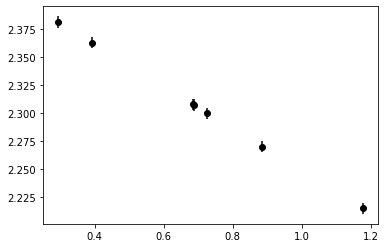

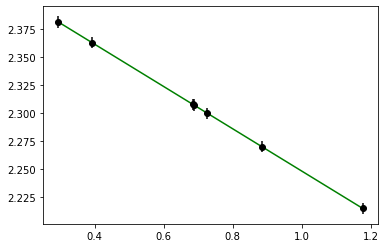

k1 = -0.18858826840447296 k0 = 2.4366277689659572


In [21]:
plt.errorbar(cal_m,cal_F,xerr=err_m,yerr=err_F,fmt='ko')
plt.show()

lineal = lambda x,k1,k0 : k1*x+k0

popt,cov = cf(lineal,cal_m,cal_F)
k1,k0 = popt
x = np.linspace(min(cal_m),max(cal_m),100)
y = lineal(x,k1,k0)
plt.errorbar(cal_m,cal_F,xerr=err_m,yerr=err_F,fmt='ko')
plt.plot(x,y,'g')
plt.show()
print('k1 = ' + str(k1),'k0 = ' + str(k0))

Para medir la masa incógnita, se utiliza una plataforma de mayor tamaño (y peso), debiendo colocarla con mayor cuidado para evitar oscilaciones que disminuyan el efecto del peso en el sensor. Una vez obtenido un valor promedio a lo largo de 10 segundos, se le resta el valor del peso de la plataforma y se lo divide por g para llegar a la masa. Se propagan los errores acordemente.

In [22]:
m_plat = 0.17175 # masa de la plataforma utilizada para la masa incógnita
F_tot = 2.159828 # fuerza medida por el sensor con la plataforma y la masa incógnita colgadas
sig_F = 0.000131  # error estadístico de la fuerza
m_inc = (F_tot - m_plat*9.8)/9.8 # masas incógnita
from math import floor
dm = round(np.sqrt(err_F**2 + err_m*9.8**2)/9.8,-int(floor(np.log10(abs(np.sqrt(err_F**2 + err_m*9.8**2)/9.8)))))
# error de la masas incógnita
print('La masa incógnita tiene un valor de (' + str(round(m_inc,3)) + '±' + str(dm) + ') kg')

La masa incógnita tiene un valor de (0.049±0.007) kg


Este resultado se basa en la calibración dada por los coeficientes previamente obtenidos, pero la misma daba valores erróneos al evaluar su validez con las masas previamente utilizadas (y al no colocar nada en el sensor). Todo esto ocurría de tal forma que no podía ser producido por un corrimiento respecto a la ordenada del origen (o al menos no únicamente), por lo que el valor carece de significancia experimental. La razón detrás de esto podría variar desde problemas en el proceso de medición a mal funcionamiento del sensorDAQ.